Hi, my name is **Aman Yadav**. I am currently pursuing my **Master’s in Life Science Informatics**. Before joining university, stars and space have always fascinated me, sparking my curiosity about the universe.
I have a deep interest in **astrophotography** and the study of **star alignments and classifications**. This project is my independent endeavor to explore something related to my hobby while integrating my knowledge of **data visualization, manipulation, and machine learning**.
The dataset for this project has been sourced from Kaggle (**https://www.kaggle.com/code/ybifoundation/stars-classification**). Through this work, I aim to blend my passion for astronomy with my expertise in computer science, creating meaningful insights into the classification of stars.


This project is based on a dataset containing 240 entries of stars along with their various features. Our goal is to predict the type of star, represented by the **"Spectral Class"** column, using different features and multiple machine learning models.

We will analyze the accuracy of these models before and after applying **Bagging** to observe performance differences. This study will help us understand how Bagging improves classification accuracy and explore further enhancements that can be made.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score 

In [2]:
df = pd.read_csv("Stars_Cat.csv")
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


# Data Analysis and Visualization


**Before proceeding with the training set, I analyzed the features of the stars and their distribution in the dataset.**
As you can see in the following code that mosy of the Stars are either **red** or **Pure Blue**.

In [3]:
numbers = df["Star color" ].value_counts()
numbers

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

**Here are the names of each Stars and some examples**

In [4]:

Types = {
    "Spectral Class": ["O", "B", "A", "F", "G", "K", "M"],
    "Characteristics": [
        "Very hot, blue stars",
        "Blue-white, extremely luminous",
        "White stars, strong hydrogen lines",
        "Yellow-white stars, moderate hydrogen lines",
        "Yellow stars (like the Sun), moderate metal lines",
        "Orange stars, cooler than the Sun",
        "Red stars, coolest among main sequence"
    ],
    "Example Stars": [
        "Zeta Puppis, Mintaka",
        "Rigel, Spica",
        "Sirius, Vega",
        "Procyon, Canopus",
        "Sun, Alpha Centauri A",
        "Arcturus, Aldebaran",
        "Betelgeuse, Proxima Centauri"
    ]
}

df_spectral_classes = pd.DataFrame(Types)

df_spectral_classes


,Spectral Class,Characteristics,Example Stars
0,O,"Very hot, blue stars","Zeta Puppis, Mintaka"
1,B,"Blue-white, extremely luminous","Rigel, Spica"
2,A,"White stars, strong hydrogen lines","Sirius, Vega"
3,F,"Yellow-white stars, moderate hydrogen lines","Procyon, Canopus"
4,G,"Yellow stars (like the Sun), moderate metal lines","Sun, Alpha Centauri A"
5,K,"Orange stars, cooler than the Sun","Arcturus, Aldebaran"
6,M,"Red stars, coolest among main sequence","Betelgeuse, Proxima Centauri"


The most common star in the dataset is M Class which is **Red stars, coolest among main sequence**	

In [5]:
class_counts = df["Spectral Class"].value_counts()
class_counts

Spectral Class
M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


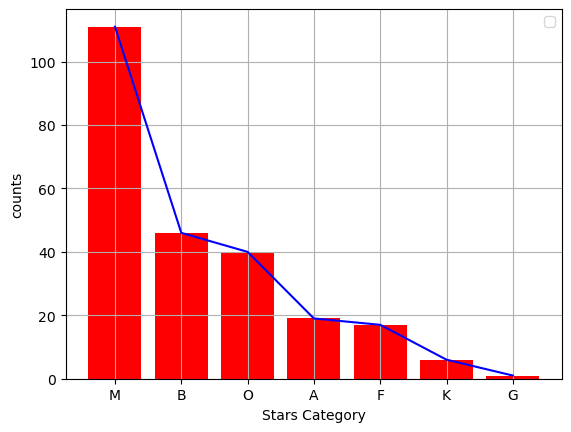

In [6]:
plt.bar(class_counts.index, class_counts.values, color = "red")
plt.plot(class_counts.index, class_counts.values, color = "blue")
plt.grid()
plt.xlabel("Stars Category")
plt.ylabel("counts")
plt.legend()

In [7]:
df.describe

<bound method NDFrame.describe of      Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     

In [8]:
df["color"] = df["Star color"].map({
    "Red": "red",
    "Blue": "blue",
    "White": "white",
    "Yellow": "yellow",
    "Orange": "orange",
    "Blue-white": "cyan",
    "Yellow-white": "lightyellow",
    "blue white": "cyan",
    "yellowish white": "lightyellow",
    "Whitish": "white",
    "Orange-red": "orangered",
    "Blue-White": "cyan",
    "pale yellow orange": "orange",
    "yellowish": "yellow"
})



In [9]:
df['color'].fillna('gray', inplace=True)

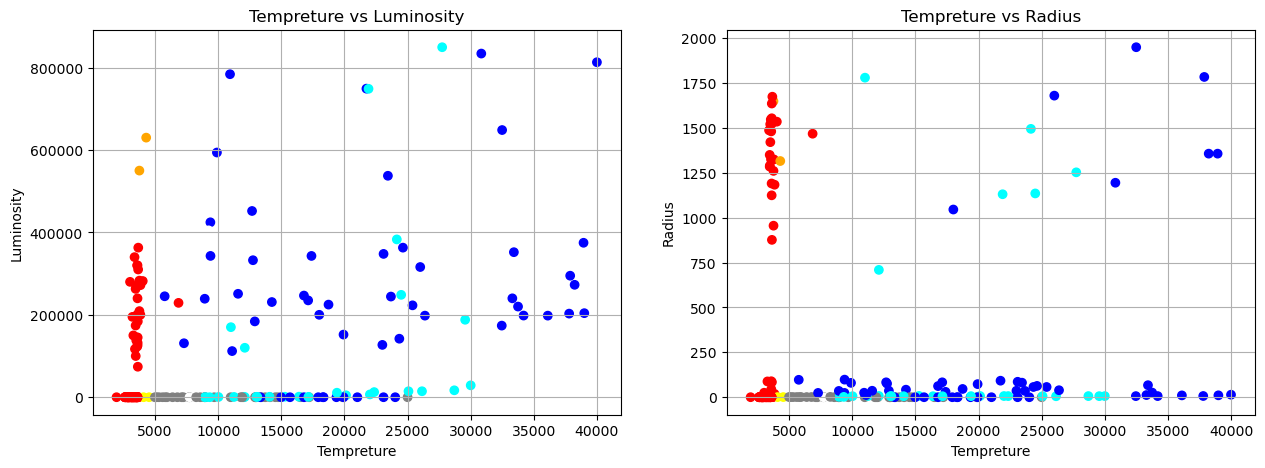

In [10]:
fig ,axs = plt.subplots(nrows = 1, ncols= 2 , figsize = (15 , 5))
axs[0].scatter(df["Temperature (K)"],  df["Luminosity(L/Lo)"],c = df["color"])
axs[0].set_xlabel("Tempreture")
axs[0].set_ylabel("Luminosity")
axs[0].set_title ("Tempreture vs Luminosity")
axs[0].grid(True)


axs[1].scatter(df["Temperature (K)"],  df["Radius(R/Ro)"],c = df["color"])
axs[1].set_xlabel("Tempreture")
axs[1].set_ylabel("Radius")
axs[1].set_title ("Tempreture vs Radius")
axs[1].grid(True)

The above graphs help us understand that most of the stars in the dataset are not very hot or luminous. There are only a few blue stars that are highly luminous, but by observing the graph, we cannot conclude that there is a direct relationship between luminosity and temperature. This is because many hot stars have low luminosity, while some cool red stars appear to be much more luminous. This suggests that factors beyond temperature influence a star’s brightness. **The same observation applies to the radius and temperature relationship, where we can see that radius does not directly influence a star’s temperature. Most of the larger stars tend to have lower temperatures, while many smaller stars have comparatively higher temperatures. This indicates that the relationship between radius and temperature is not linear, and other factors likely play a role in determining a star’s characteristics.**

In [11]:
df['mass'] = df['Luminosity(L/Lo)'] ** (1 / 3.5)
print(df)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

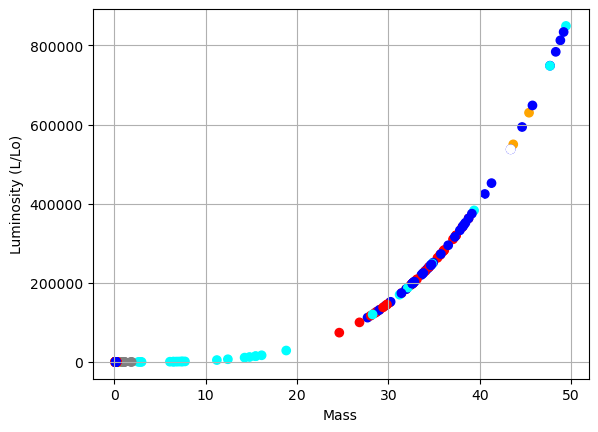

In [12]:
plt.scatter(df["mass"] ,df['Luminosity(L/Lo)'] , c =df["color"] )
plt.grid(True)
plt.xlabel("Mass")
plt.ylabel("Luminosity (L/Lo)")
plt.title =("Mass")



**This scatter plot illustrates the relationship between Mass (x-axis) and Luminosity (L/Lo) (y-axis) of different stars.**
The graph shows a non-linear exponential relationship between mass and luminosity. Stars with higher mass tend to have much higher luminosity, indicating that luminosity increases disproportionately as mass increases. In the low-mass region (mass < 20), the luminosity remains very low and nearly constant. These stars include red and yellow dwarfs, which are relatively cooler and dimmer. **Beyond a mass of 20 solar masses, the luminosity starts increasing rapidly. The blue stars, which are massive, show an exponential rise in luminosity as mass increases. The most massive stars (mass > 40) have an extremely high luminosity, reaching values over 800,000 times the Sun’s luminosity.**
This trend aligns with the mass-luminosity relationship in astrophysics, which states that luminosity (L) is proportional to mass (M) raised to the power of ~3.5 (L ∝ M³.⁵).
**This means small increases in mass lead to huge increases in luminosity, which is why massive stars burn fuel much faster and have shorter lifespans.**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)','mass','Star type']

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,color,mass
0,-0.779382,-0.598624,-0.459210,1.116745,-1.46385,Red,M,red,-0.797429
1,-0.782110,-0.598624,-0.459241,1.162414,-1.46385,Red,M,red,-0.801240
2,-0.828477,-0.598624,-0.459342,1.362213,-1.46385,Red,M,red,-0.802155
3,-0.807496,-0.598624,-0.459229,1.167171,-1.46385,Red,M,red,-0.802792
4,-0.897819,-0.598624,-0.459340,1.491607,-1.46385,Red,M,red,-0.803314
...,...,...,...,...,...,...,...,...,...
235,2.983743,1.494720,2.167974,-1.361718,1.46385,Blue,O,blue,1.505927
236,2.133913,4.059319,1.854068,-1.428317,1.46385,Blue,O,blue,2.099989
237,-0.175029,2.403157,2.297800,-1.437832,1.46385,White,A,white,1.756924
238,-0.132438,1.662878,1.695177,-1.485403,1.46385,White,A,white,1.557577


**Standardization of data is essential so it can be used in classification models. Hence, standardization is a very important step and must be done before using the data to train a model.**

# Traing and Testing data Split 

In [14]:
from sklearn.model_selection import train_test_split
Y = df['Spectral Class']
X = df.drop(['Spectral Class','color','Star color'], axis=1)

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 300)


# Knn Model with neighbours = 3

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)


In [16]:
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
Y_pred = model.predict(X_test)

print(Y_pred)


['M' 'B' 'B' 'F' 'B' 'M' 'M' 'M' 'B' 'A' 'F' 'M' 'B' 'M' 'M' 'M' 'M' 'B'
 'M' 'M' 'O' 'A' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B'
 'M' 'M' 'M' 'O' 'B' 'O' 'A' 'M' 'M' 'F' 'M' 'O']


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(Y_test,Y_pred)

array([[ 3,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  1],
       [ 0,  1,  2,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0],
       [ 0,  3,  0,  0,  1,  3]], dtype=int64)

In [19]:
accuracy_knn = accuracy_score(Y_test,Y_pred)
accuracy_knn

0.8541666666666666

In [20]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       0.56      0.83      0.67         6
           F       0.67      0.67      0.67         3
           K       0.00      0.00      0.00         1
           M       0.97      1.00      0.98        28
           O       0.75      0.43      0.55         7

    accuracy                           0.85        48
   macro avg       0.66      0.65      0.64        48
weighted avg       0.85      0.85      0.84        48



C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(Y_test, Y_pred)
print("MCC Score:", mcc)

MCC Score: 0.7643413330373594


**The model accuracy is 85%, which is not bad, and the MCC score is 0.76, indicating that the model is performing quite fairly.**


# Decision Tree Classifier

In [22]:

model1 = DecisionTreeClassifier()
model1.fit(X_train,Y_train)

DecisionTreeClassifier()

In [23]:
Y_pred_logistic = model1.predict(X_test)
Y_pred_logistic
print(confusion_matrix(Y_test,Y_pred_logistic))

[[ 3  0  0  0  0  0]
 [ 0  5  0  0  0  1]
 [ 0  0  3  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0 28  0]
 [ 1  1  0  0  0  5]]


In [24]:
accuracy_Decision= accuracy_score(Y_test,Y_pred_logistic)
accuracy_Decision

0.9375

In [25]:
print(classification_report(Y_test,Y_pred_logistic))

              precision    recall  f1-score   support

           A       0.75      1.00      0.86         3
           B       0.83      0.83      0.83         6
           F       1.00      1.00      1.00         3
           K       1.00      1.00      1.00         1
           M       1.00      1.00      1.00        28
           O       0.83      0.71      0.77         7

    accuracy                           0.94        48
   macro avg       0.90      0.92      0.91        48
weighted avg       0.94      0.94      0.94        48



In [26]:
mcc1 = matthews_corrcoef(Y_test, Y_pred_logistic)
print("MCC Score:", mcc1)

MCC Score: 0.8992268158378083


**The model accuracy is 92%, which is good, and the MCC score is 0.86, indicating that the model is performing quite better than Knn.**

The Decision Tree performs significantly better than k-NN for non-linear datasets as it can capture complex relationships by recursively splitting the feature space, works well with both categorical and numerical data, does not rely on distance metrics (making it robust to feature scaling), efficiently handles high-dimensional data, and while prone to overfitting, this can be controlled using pruning or ensemble methods like Random Forest and Gradient Boosting.

# Bagging classifier with Knn (Neighbour - 3)

In [27]:
from sklearn.ensemble import BaggingClassifier
Bagging_Knn = BaggingClassifier(base_estimator= KNeighborsClassifier(n_neighbors = 3), 
                                n_estimators=10,
                                max_samples=0.8, 
                                bootstrap=True,  
                                random_state=42)

Bagging_Knn.fit(X_train,Y_train)                                

C:\Users\Aman Yadav\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  max_samples=0.8, random_state=42)

In [28]:
Y_pred_Bagging = Bagging_Knn .predict(X_test)
Y_pred_Bagging

array(['M', 'B', 'B', 'F', 'O', 'M', 'M', 'M', 'B', 'M', 'F', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'O', 'A', 'M', 'M', 'M', 'M',
       'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'O', 'B', 'O', 'A', 'M', 'M', 'F', 'M', 'O'], dtype=object)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_Bagging_Knn = accuracy_score(Y_test, Y_pred_Bagging)
accuracy_Bagging_Knn

0.8541666666666666

In [30]:
mcc2 = matthews_corrcoef(Y_test, Y_pred_Bagging)
print("MCC Score:", mcc2)

MCC Score: 0.7585777600249436


**The accuracy is still 85% which means the model didnt changed after applying it with bagging**  

# Bagging classifier with Random Forest

In [31]:

Bagging_Logistic = BaggingClassifier(estimator= RandomForestClassifier(), 
                                n_estimators=10,
                                max_samples=0.8, 
                                bootstrap=True,  
                                random_state=42)

Bagging_Logistic.fit(X_train,Y_train)   

BaggingClassifier(estimator=RandomForestClassifier(), max_samples=0.8,
                  random_state=42)

In [34]:
Bagging_Logistic.fit(X_test,Y_test)
Y_Bagging_RandomForest = Bagging_Logistic.predict(X_test)
Y_Bagging_RandomForest

array(['M', 'B', 'B', 'F', 'O', 'O', 'M', 'M', 'B', 'O', 'F', 'M', 'F',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'O', 'A', 'M', 'M', 'M', 'M',
       'M', 'O', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M',
       'O', 'O', 'O', 'A', 'M', 'M', 'F', 'M', 'O'], dtype=object)

In [36]:
accuracy_Bagging_RandomForest = accuracy_score(Y_test, Y_Bagging_RandomForest)
accuracy_Bagging_RandomForest

0.9375

In [38]:
mcc3 = matthews_corrcoef(Y_test, Y_Bagging_RandomForest)
print("MCC Score:", mcc3)

MCC Score: 0.9003834672988161


**Bagging improved the model slightly by few percents but its still beter than models without bagging**

In [39]:
accuraccy_lists = [accuracy_knn,accuracy_Bagging_Knn,accuracy_Decision, accuracy_Bagging_RandomForest]
accuraccy_Models = ["accuracy_knn","accuracy_Bagging_Knn","accuracy_Decision", "accuracy_Bagging_RandomForest"]
print(accuraccy_lists)


[0.8541666666666666, 0.8541666666666666, 0.9375, 0.9375]


Text(0, 0.5, 'Accuracy ')

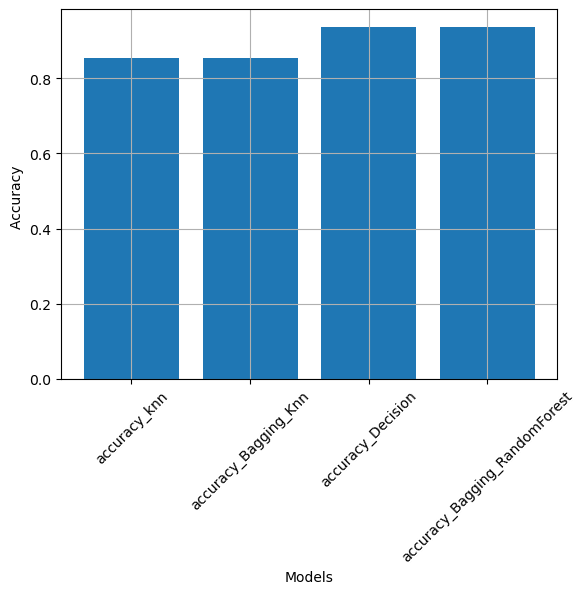

In [54]:
plt.bar(accuraccy_Models , accuraccy_lists,label="Model Accuracy")
plt.xticks(rotation=45)
plt.grid()

plt.xlabel("Models")
plt.ylabel("Accuracy ")

**In conclusion, this analysis explored the relationship between various features of stars and how they can be used to categorize stars into distinct groups. By examining key features such as mass, luminosity, temperature, and radius, we were able to understand how these characteristics contribute to the classification of stars. Throughout the process, training different machine learning models allowed me to observe that not every classification model performs equally well on the dataset. Each model has its strengths and weaknesses, and finding the best model for a given problem often requires experimentation and fine-tuning—highlighting the importance of trial and error in machine learning.**

Ultimately, after comparing the performance of various models, it was found that the Random Forest model outperformed all others in terms of accuracy and reliability. This reinforces the fact that ensemble models, like Random Forest, are often more robust and capable of handling the complexity of real-world datasets better than individual models. This experience underscored the significance of model evaluation and the iterative nature of machine learning, where continuous improvements are made based on model performance.

# END